<a href="https://colab.research.google.com/github/mustafa-hiri/spam-classification-with-lstm/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**connection of colab with my drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**see the directory that I am**

In [ ]:
!ls

gdrive	sample_data


**download the dataset via this directory : '/ content / gdrive / My Drive / Colab Notebooks / lstm_preject / spam_classifiction / datasets_spam.csv'**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/lstm_preject/spam_classifiction/datasets_spam.csv',sep = ',',encoding='latin-1')

**display the first 5 row of dataset**

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**display columns that are not useful**

In [ ]:
df_copy = df.copy()
df_copy.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], axis = 1, inplace = True)
df_copy.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**see other information on our dataset**

In [ ]:
x = df_copy.v2
y = df_copy.v1
print('shape of x is : ',x.shape)
print('shape of y is : ',y.shape)

shape of x is :  (5572,)
shape of y is :  (5572,)


In [ ]:
x[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

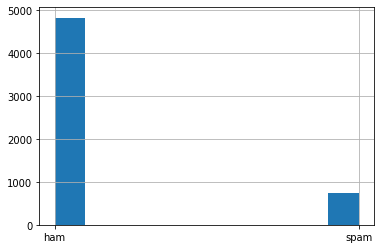

In [ ]:
y.hist()

**encode the label (y) with a numeric type**

In [ ]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)
print(y) # 0 for ham and 1 for spam
print('shape of y is : ',y.shape)'''
import pandas as pd
Y = pd.get_dummies(y).values
print('Shape of label tensor:', Y.shape)
print(Y) # 10 for ham and 01 for spam

Shape of label tensor: (5572, 2)
[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


**split the dataset between test and train data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x, Y, test_size=0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4736,) (4736, 2)
(836,) (836, 2)


**transform X_train in matrix form**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = 1000
max_len = 500
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
print("sequences : ",sequences)
print("word_index : ",tok.word_index)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
X_train = sequences_matrix
print("sequences_matrix : \n",sequences_matrix)
print('Shape of data Matrix:', sequences_matrix.shape)

sequences :  [[39, 2, 6, 20, 5, 132, 468, 4, 6, 224, 300, 358, 98, 19, 39, 86, 80, 44, 5], [44, 122, 144], [523, 158], [115, 99, 411, 10, 21], [119, 524, 4, 15, 11, 248, 707, 10, 2, 576, 43, 7, 60, 838, 37, 162, 7, 58, 707, 10, 20, 28, 4, 140, 162, 838, 126, 133, 839, 166, 240, 249, 23, 3, 84, 50, 28], [167, 68, 9, 38, 267, 8], [94, 82, 107, 231, 15, 14], [25, 126, 225, 2, 551, 12, 750, 16, 840, 2, 226, 13, 551, 193, 141], [751, 52, 5, 306, 37, 14], [33, 137, 287, 89, 7, 525, 2, 3, 29, 3, 17, 4, 376, 330, 145], [201, 334, 9, 8], [666, 28, 81, 8, 5], [36, 43, 134, 4, 435, 76, 6, 667, 23, 1, 91, 57, 6, 144, 21, 1, 469, 54, 188, 76, 116, 24, 1, 335, 155, 43, 12, 14], [92, 377, 155, 37, 11, 412, 271, 51, 86, 6, 43, 19, 143, 10, 4, 16, 8, 7, 413, 27, 74, 34, 292, 523, 26, 797, 10, 18, 41, 797, 21, 67, 359], [42, 40, 8, 24, 25], [86, 6, 81, 448, 21], [174, 38, 1, 36, 78, 2, 151, 8, 11, 60, 18, 193, 1, 53], [4, 37], [28, 7], [168, 56, 360, 202], [1, 33, 35, 897, 400, 107, 52, 46, 68], [401, 4

**model definition (lstm) and train the model**

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.models import Sequential

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 1000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = max_len
# This is fixed.
EMBEDDING_DIM = 50

# model definition
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# train the model
epochs = 32
batch_size = 128
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           50000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 500, 50)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 110,602
Trainable params: 110,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
30/30 [==============================] - 54s 2s/step - loss: 0.3891 - accuracy: 0.8646 - val_loss: 0.1894 - val_accuracy: 0.9441
Epoch 2/32
30/30 [==============================] - 54s 2s/step - loss: 0.1257 - accuracy: 0.9683 - val_loss

**test the model**

In [ ]:
#Process the test set data.

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

#Evaluate the model on the test set.
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

27/27 [==============================] - 3s 118ms/step - loss: 0.0645 - accuracy: 0.9785
Test set
  Loss: 0.064
  Accuracy: 0.978


**see the evolution of model (loss and accuracy) with train data**

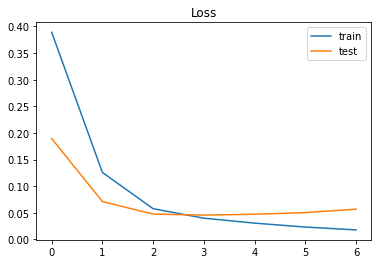

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

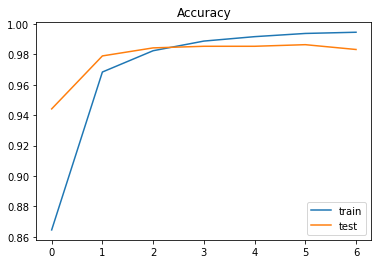

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

**save the model with .h5 extension**

In [ ]:
model.save('model.h5')

**example with test data**

In [ ]:
#example normal message
sample_texts = ["Hi, Back in high school I was not that great of a public speaker. The stress. The anxiety. The fear of making a stupid mistake and saying something wrong in front of an auditorium filled with people was paralyzing -- the pressure weighed on me and delivered a severe blow to my public speaking confidence. But after 4 years in graduate school filled with presenting papers in front of battle hungry academics, just waiting to pounce on you at first light of slipping up, and defending my dissertation in front of my committee, knowing that I was going to be grilled at any second, I was able to conquer my fear of public speaking. You see, I recently talked about computer vision, surveillance and tracking, and the algorithms behind [bank] check detection and recognition on the Hanselminutes podcast."]

txts = tok.texts_to_sequences(sample_texts)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)
labels = ['ham', 'spam']

print('the message is : ', labels[np.argmax(preds)],' of : ',preds[0][np.argmax(preds)]*100,'%')

the message is :  ham  of :  99.38048124313354 %


In [ ]:
#example spam message
import numpy as np

sample_texts = ["Are you a Business owner or a Broker/Financial Consultant looking for a Business loan? We offer Equity line of credit loan, Business/Marketing loan, Project loan, Personal loan, Housing loan, Real Estate loan, Student loan, Car loan etc. at 3% interest rate per annual.  On a Personal loan, amounts offered ranges from $5000 to a maximum of $100,000.00 USD, with a maximum duration of 5 - 10 years, while our Business loan amounts offered ranges from $200,000.00 USD to a maximum of $100,000,000.00 USD, with a maximum duration of 20 years. What is unique about our services is that you can obtain a loan with/without collateral provided you are reliable and your information is correct and verifiable.  If interested our loan application form is available to apply, kindly contact us today via email. ( Email: lendified.01@outlook.com  )  Thanks, Best Regard. Warren Wiersbe"]

txts = tok.texts_to_sequences(sample_texts)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)
labels = ['ham', 'spam']

print('the message is : ', labels[np.argmax(preds)],' of : ',preds[0][np.argmax(preds)]*100,'%')

the message is :  spam  of :  99.97721314430237 %


**example with real data**

In [ ]:
#example spam message
import numpy as np

sample_texts = [",Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

txts = tok.texts_to_sequences(sample_texts)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)
labels = ['ham', 'spam']

print('the message is : ', labels[np.argmax(preds)],' of : ',preds[0][np.argmax(preds)]*100,'%')

the message is :  spam  of :  99.99524354934692 %
